In [1]:
import warnings; warnings.filterwarnings("ignore")

from id_signaling.figures import load_minority_dfs, covert_vs_minority_frac, minority_diff_heatmap

# Minority group experiments

In these experiments we set some minority of the population to have one or several traits in common, and the rest of the population has the opposite value for that trait. That is, some number $M$ out of $K$ traits are set to 1 in the minority population and set to -1 in the majority population. We vary the minority population prevalence to be $\rho^{minor} \in \{0.05, 0.1, \ldots, 0.45\}$. 

We computed heatmaps like in the basic experiment, but in this case computed the difference between prevalence of covert signaling in the minority versus the majority ($\Delta \rho_{cov,T} = \rho_{cov,T}^{minor} - \rho_{cov,T}^{major}$). The heatmaps show us how difference in covert signaling prevalence varies over both homophily and disliking penalty for one value of $\rho^{minor}$. 

We also plotted difference in covert signaling prevalence as a function of $\rho^{minor}$ for several values of homophily, $w \in \{0.0, 0.05, 0.1, \ldots, 0.5\}$. In each of these plots we show three values of disliking penalty $d=\delta \in \{0.05, 0.25, 0.45\}$.

## $\Delta \rho_{cov,T}$ heatmaps

For all but the final heatmap, agents have $K=3$ traits and minority/majority are determined by the value of $M=1$ of those traits. In the final heatmap, we perform a robustness check for $K=10$ and $M=4$. We consider only three values of $\rho^{minor} \in \{0.05, 0.1, 0.25\}$.

In [4]:
dfs = []
paths = ['data/minority/0.05/full.csv',
         'data/minority/0.10/full.csv',
         'data/minority/0.25/full.csv',
         'data/minority-K=10/full.csv']

for p in paths:
    dfs.append(pd.read_csv(p))

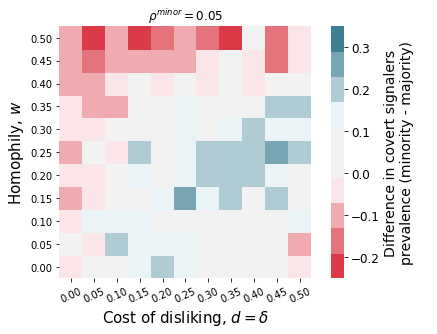

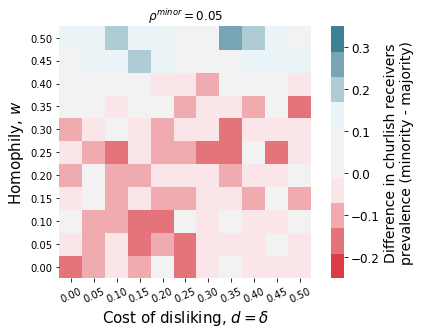

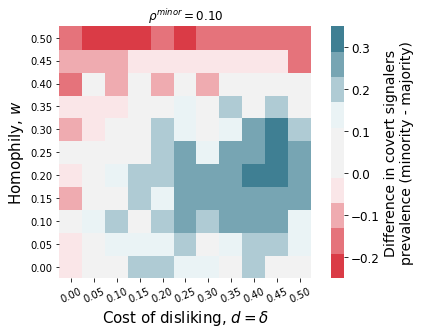

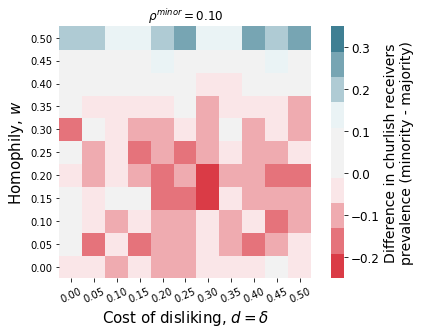

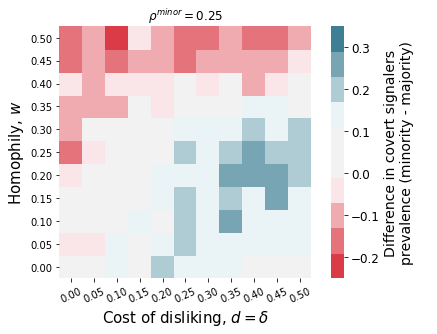

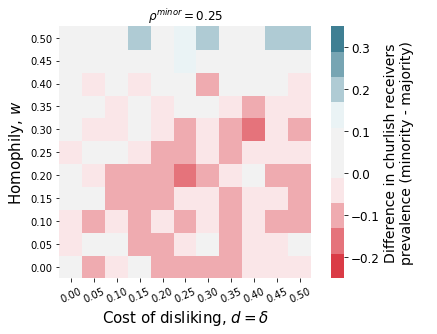

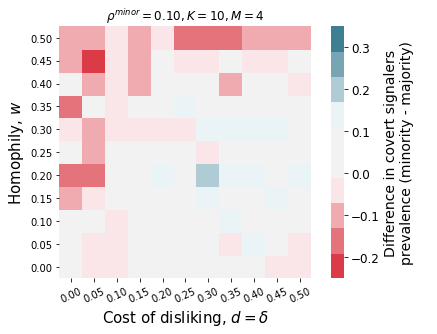

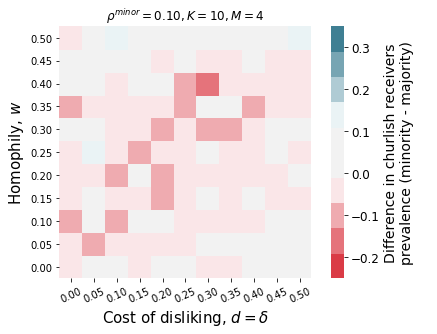

In [19]:
minority_diff_heatmap(dfs[0], vmin=-0.25, vmax=0.35,
                      title=r'$\rho^{minor}=0.05$',
                      savefig_path='reports/Figures/covert_signalers_diff_0p05.pdf')
minority_diff_heatmap(dfs[0], strategy='receiving', 
                      title=r'$\rho^{minor}=0.05$',
                      vmin=-0.25, vmax=0.35, 
                      savefig_path='reports/Figures/churlish_receivers_diff_0p05.pdf')


minority_diff_heatmap(dfs[1], vmin=-0.25, vmax=0.35,
                      title=r'$\rho^{minor}=0.10$',
                      savefig_path='reports/Figures/covert_signalers_diff_0p10.pdf')
minority_diff_heatmap(dfs[1], strategy='receiving', vmin=-0.25, vmax=0.35, 
                      title=r'$\rho^{minor}=0.10$',
                      savefig_path='reports/Figures/churlish_receivers_diff_0p10.pdf')


minority_diff_heatmap(dfs[2],vmin=-0.25, vmax=0.35,
                      title=r'$\rho^{minor}=0.25$',
                      savefig_path='reports/Figures/covert_signalers_diff_0p25.pdf')
minority_diff_heatmap(dfs[2], strategy='receiving', vmin=-0.25, vmax=0.35, 
                      title=r'$\rho^{minor}=0.25$',
                      savefig_path='reports/Figures/churlish_receivers_diff_0p25.pdf')


minority_diff_heatmap(dfs[3], vmin=-0.25, vmax=0.35, 
                      title=r'$\rho^{minor}=0.10, K=10, M=4$',
                      savefig_path='reports/Figures/covert_signalers_diff_0p10_K=10_M=4.pdf')
minority_diff_heatmap(dfs[3], strategy='receiving', 
                      title=r'$\rho^{minor}=0.10, K=10, M=4$',
                      vmin=-0.25, vmax=0.35, 
                      savefig_path='reports/Figures/churlish_receivers_diff_0p10_K=10_M=4.pdf')

## Difference over $\rho^{minor}$

In [3]:
minority_dfs = load_minority_dfs()

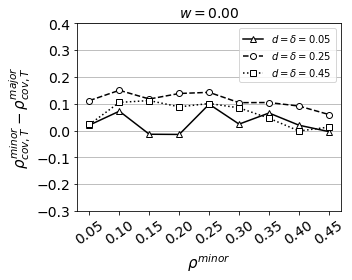

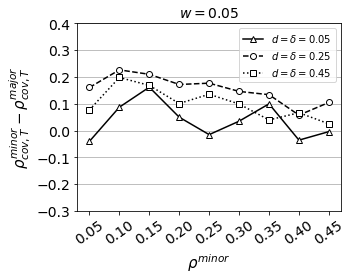

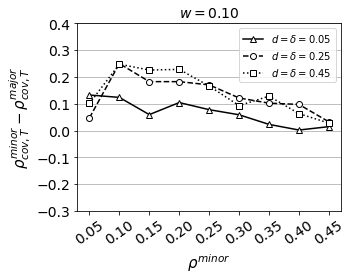

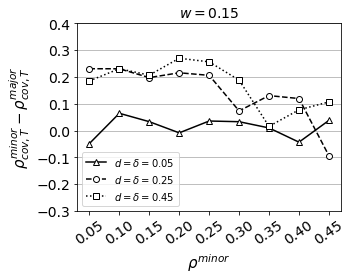

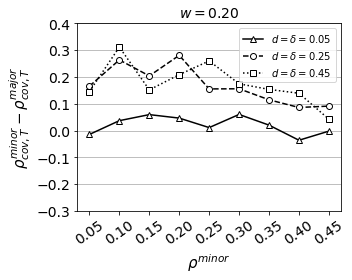

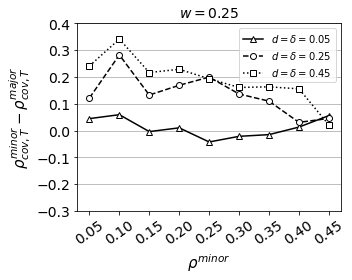

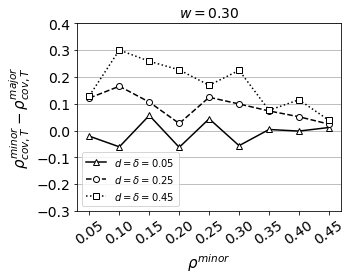

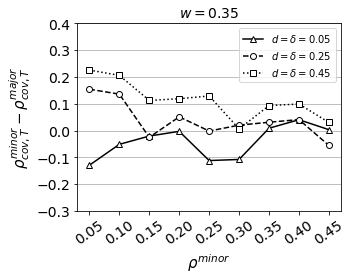

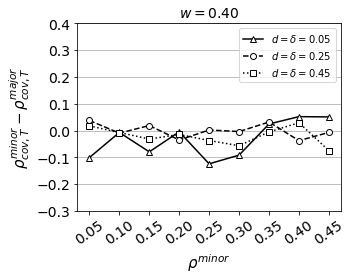

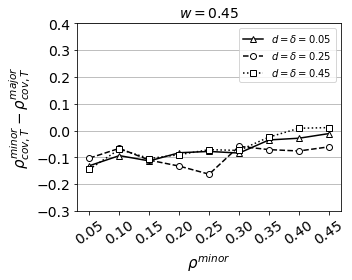

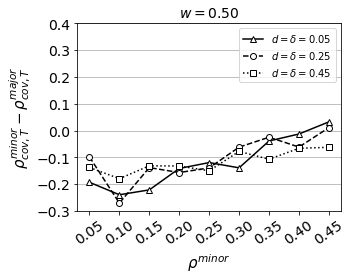

In [5]:
# covert_vs_minority_frac(minority_dfs, [0.1, 0.25, 0.45], 0.25)

# Excluding the first data point for main text publication plots.
# for homophily in np.arange(0, 0.51, 0.05)[1::2]:
#    covert_vs_minority_frac(minority_dfs, [0.05, 0.25, 0.45], homophily, 
#                             savefig_path=f'reports/Figures/minority-homophily={homophily:.2f}'.replace('.', 'p') + '.pdf')
# for homophily in np.arange(0, 0.51, 0.05)[-2:]:

# Including the first data point for supplement.
for homophily in np.arange(0, 0.51, 0.05):
#     print(homophily)
    covert_vs_minority_frac(minority_dfs, [0.05, 0.25, 0.45], homophily, exclude_p05=False,
                            savefig_path=f'reports/Figures/full-minority-homophily={homophily:.2f}'.replace('.', 'p') + '.pdf')

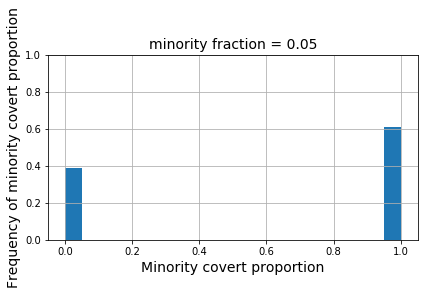

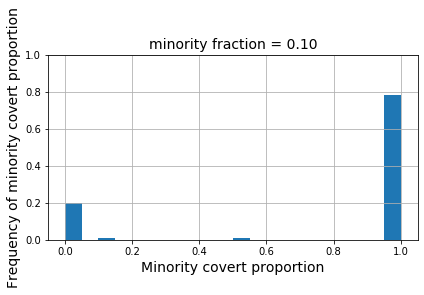

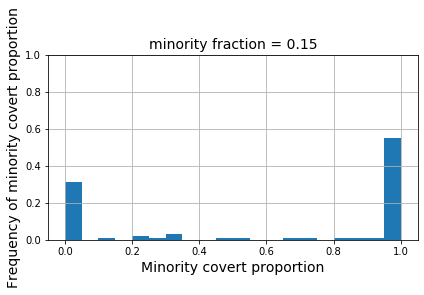

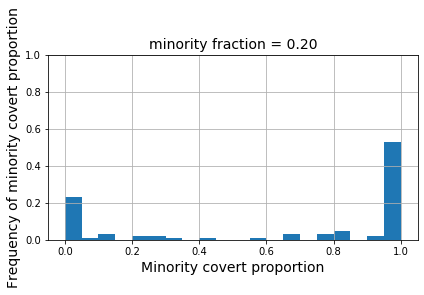

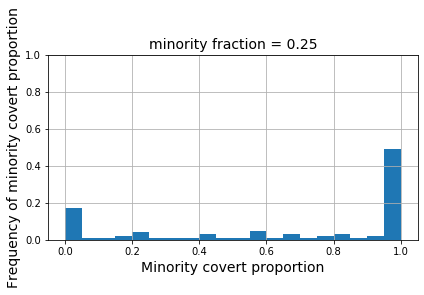

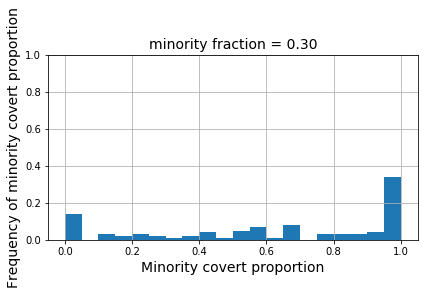

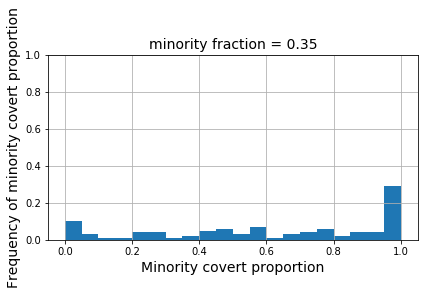

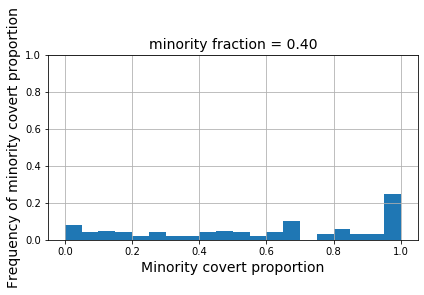

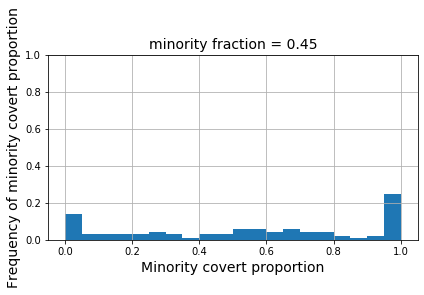

In [58]:
df = minority_dfs[5][1]
disliking = 0.25
homophily = 0.25

for label, df in minority_dfs:
#     print(label)
    plt.figure()
    pre = mean_final_cov_prop = df[
                (df.timestep == 500) &
                (df.disliking == disliking) &
                (df.homophily == homophily)
            ]
    pre.prop_covert_minority.hist(bins=20, weights=np.ones(100)/100)
    plt.ylim(0, 1)
    plt.title(f'minority fraction = ' + label, size=14)
    plt.ylabel('Frequency of minority covert proportion', size=14)
    plt.xlabel('Minority covert proportion', size=14)

In [34]:
df0 = minority_dfs[0][1]

df0.head()


minority_dfs[-1][1].head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,minority_trait_frac,prop_churlish,prop_churlish_majority,prop_churlish_minority,prop_covert,prop_covert_majority,prop_covert_minority,timestep,trial_idx
0,0.0,0.0,0.5,0.5,0.45,0.50,0.400000,0.622222,0.53,0.527273,0.533333,0,228655451
1,0.0,0.0,0.5,0.5,0.45,0.49,0.400000,0.600000,0.54,0.563636,0.511111,1,228655451
2,0.0,0.0,0.5,0.5,0.45,0.50,0.381818,0.644444,0.54,0.563636,0.511111,2,228655451
3,0.0,0.0,0.5,0.5,0.45,0.50,0.381818,0.644444,0.53,0.563636,0.488889,3,228655451
4,0.0,0.0,0.5,0.5,0.45,0.50,0.400000,0.622222,0.53,0.545455,0.511111,4,228655451
